In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\datasets.csv")
df.head(10)

,InvoiceID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,netttotal,profitpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01-10-2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


*from the datasets check whether profit margin is low or not
*which product is selling more 
*at what time  crowd is more
*find payment type of the customer 
*find in which months business was on hike 
*also find in which branch profit is more 
*which type of customer doing more business
*which gender is doing more shopping

# Data cleaning 

In [9]:
df.isnull().sum()

InvoiceID           0
Branch              0
City                0
Customertype        0
Gender              0
Productline         0
Unitprice           0
Quantity            0
Tax5%               0
Total               0
Date                0
Time                0
Payment             0
netttotal           0
profitpercentage    0
grossincome         0
Rating              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceID         1000 non-null   object 
 1   Branch            1000 non-null   object 
 2   City              1000 non-null   object 
 3   Customertype      1000 non-null   object 
 4   Gender            1000 non-null   object 
 5   Productline       1000 non-null   object 
 6   Unitprice         1000 non-null   float64
 7   Quantity          1000 non-null   int64  
 8   Tax5%             1000 non-null   float64
 9   Total             1000 non-null   float64
 10  Date              1000 non-null   object 
 11  Time              1000 non-null   object 
 12  Payment           1000 non-null   object 
 13  netttotal         1000 non-null   float64
 14  profitpercentage  1000 non-null   float64
 15  grossincome       1000 non-null   float64
 16  Rating            1000 non-null   float64
d

In [11]:
df.drop(['InvoiceID','Rating'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Branch            1000 non-null   object 
 1   City              1000 non-null   object 
 2   Customertype      1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Productline       1000 non-null   object 
 5   Unitprice         1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Tax5%             1000 non-null   float64
 8   Total             1000 non-null   float64
 9   Date              1000 non-null   object 
 10  Time              1000 non-null   object 
 11  Payment           1000 non-null   object 
 12  netttotal         1000 non-null   float64
 13  profitpercentage  1000 non-null   float64
 14  grossincome       1000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB


In [14]:
df.columns

Index(['Branch', 'City', 'Customertype', 'Gender', 'Productline', 'Unitprice',
       'Quantity', 'Tax5%', 'Total', 'Date', 'Time', 'Payment', 'netttotal',
       'profitpercentage', 'grossincome'],
      dtype='object')

In [17]:
df.rename(columns={'Productline':'product'},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Branch            1000 non-null   object 
 1   City              1000 non-null   object 
 2   Customertype      1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   product           1000 non-null   object 
 5   Unitprice         1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Tax5%             1000 non-null   float64
 8   Total             1000 non-null   float64
 9   Date              1000 non-null   object 
 10  Time              1000 non-null   object 
 11  Payment           1000 non-null   object 
 12  netttotal         1000 non-null   float64
 13  profitpercentage  1000 non-null   float64
 14  grossincome       1000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB


In [19]:
df.head()

,Branch,City,Customertype,Gender,product,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,netttotal,profitpercentage,grossincome
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085


In [20]:
df.describe()

,Unitprice,Quantity,Tax5%,Total,netttotal,profitpercentage,grossincome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000


*from below graph we can define that number of male are less than female but difference is only 2 .female are more shopping than the male 

# EDA

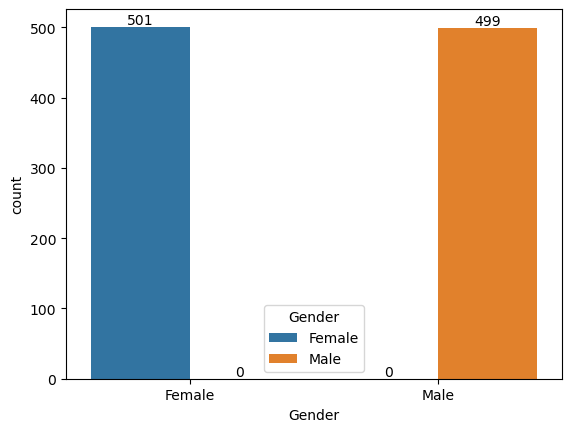

In [62]:
ax=sns.countplot(data=df,x='Gender',hue='Gender')
for bars in ax.containers:
   ax.bar_label(bars) 

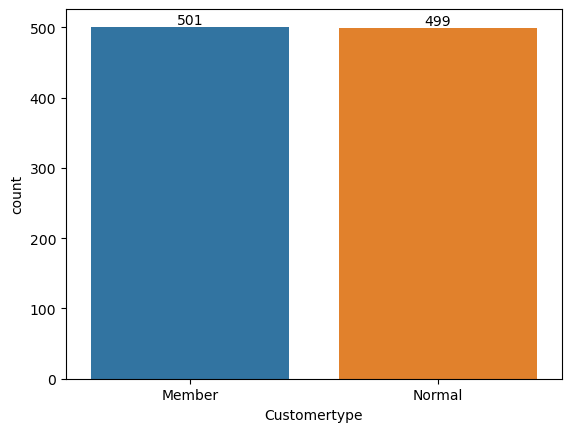

In [67]:
da=sns.countplot(data=df,x='Customertype')
for bars in da.containers:
    da.bar_label(bars)

*from above graph we can also define the member of shop are likey to be female because the number of female and member are equal
.

In [95]:
data=df.groupby('Gender')['Customertype'].value_counts()

data

Gender  Customertype
Female  Member          261
        Normal          240
Male    Normal          259
        Member          240
Name: count, dtype: int64

*we can also define that member of shop of female are 26.1% and non member are 24%. male having 24%  of membership and 25.9% are non-membership

In [103]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

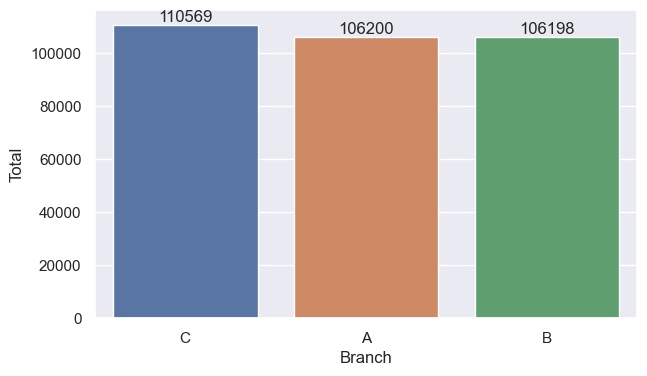

In [129]:
sns.set(rc={'figure.figsize':(7,4)})
profit_branch=df.groupby(['Branch'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)

profit_branch=sns.barplot(x='Branch',y='Total',data=profit_branch)
for bars in profit_branch.containers:
    profit_branch.bar_label(bars)

 from above graph we can define that BRANCH C has 34.2% of business  and BRANCH  A and B has 32.9%

In [133]:
net_branch=df.groupby(['Branch'],as_index=False)['netttotal'].sum().sort_values(by='netttotal',ascending=False)
net_branch

,Branch,netttotal
2,C,105303.53
0,A,101143.21
1,B,101140.64


In [134]:
df.netttotal.sum()

307587.38

In [137]:
df.Total.sum()

322966.749

*we define now that netmargin is high  but percentage of profit is average after deducting everything

In [139]:
df.head()

,InvoiceID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,netttotal,profitpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [141]:
df.Productline.value_counts()

Productline
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

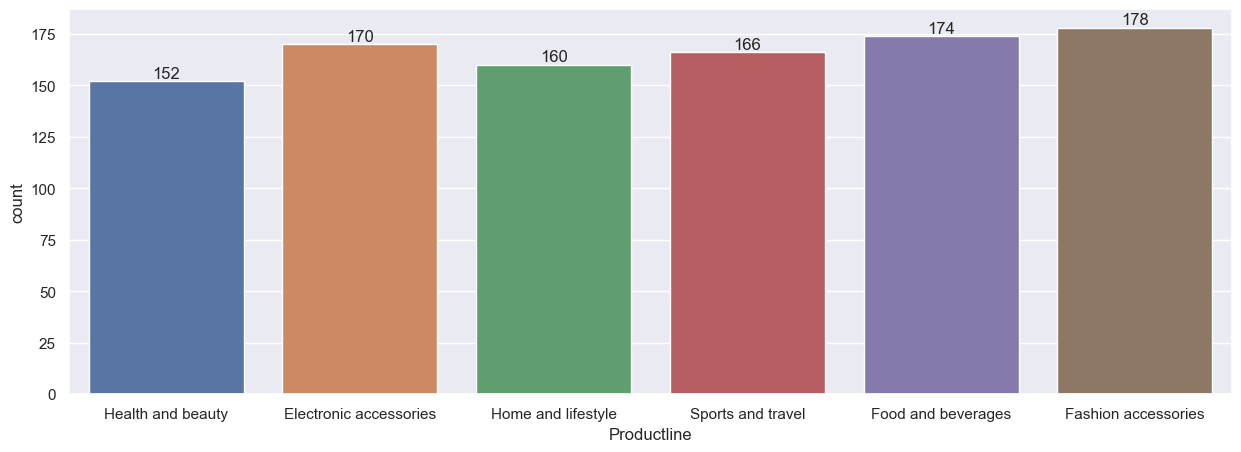

In [152]:
sns.set(rc={'figure.figsize':(15,5)})
product=sns.countplot(data=df,x='Productline')
for bars in product.containers:
    product.bar_label(bars)


*we can see that the fashion items are been sold more than the others and food grocery items too

In [162]:
df.Productline.value_counts()

Productline
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

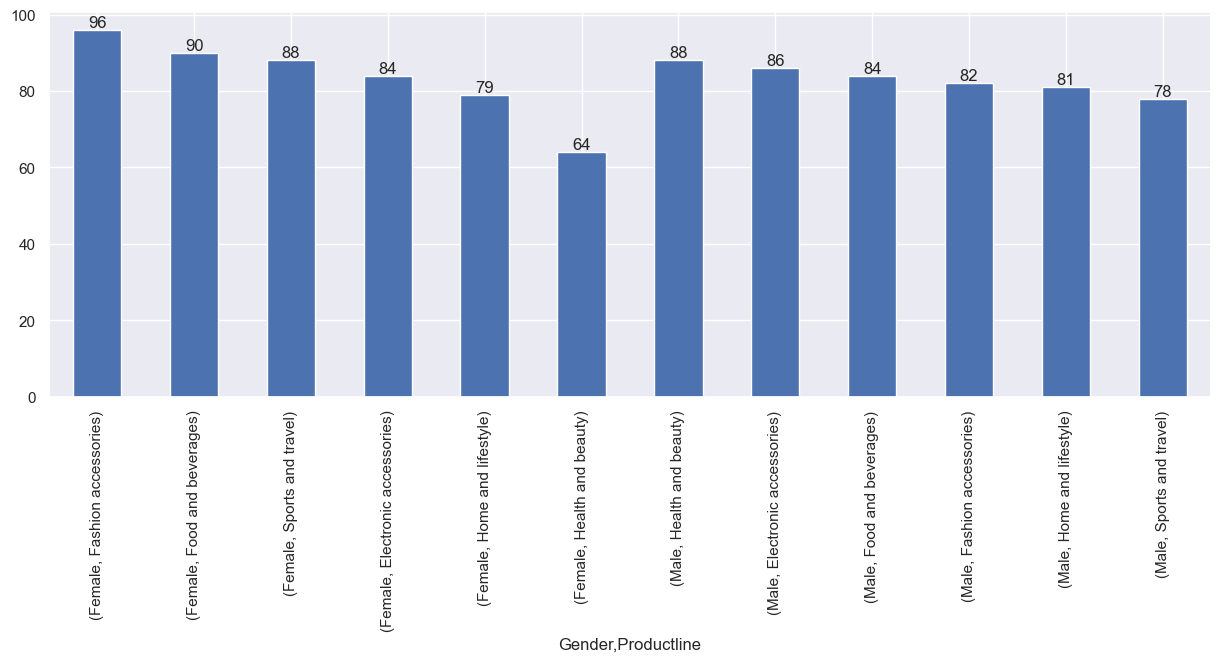

In [167]:
ff=df.groupby('Gender')['Productline'].value_counts().plot(kind='bar')
for bars in ff.containers:
    ff.bar_label(bars)

* from this we can see that female are not interested in health and beauty but the male are into health and beauty and male are also less number in sports items and also female has less interest in home and lifestyle items

In [169]:
df.head(2)

,InvoiceID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,netttotal,profitpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6


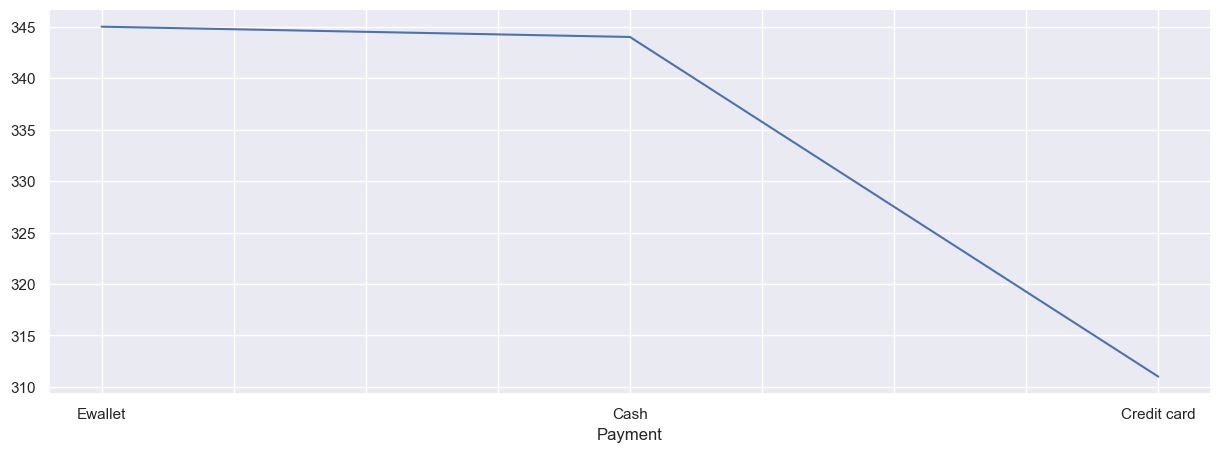

In [187]:

a=df['Payment'].value_counts().plot(kind='line')
for bars in a.containers:
    a.bar_label(bars)

*as we see that most the customer are doing online and cash payment.we have very less numbers of credit payment

<Axes: xlabel='Time'>

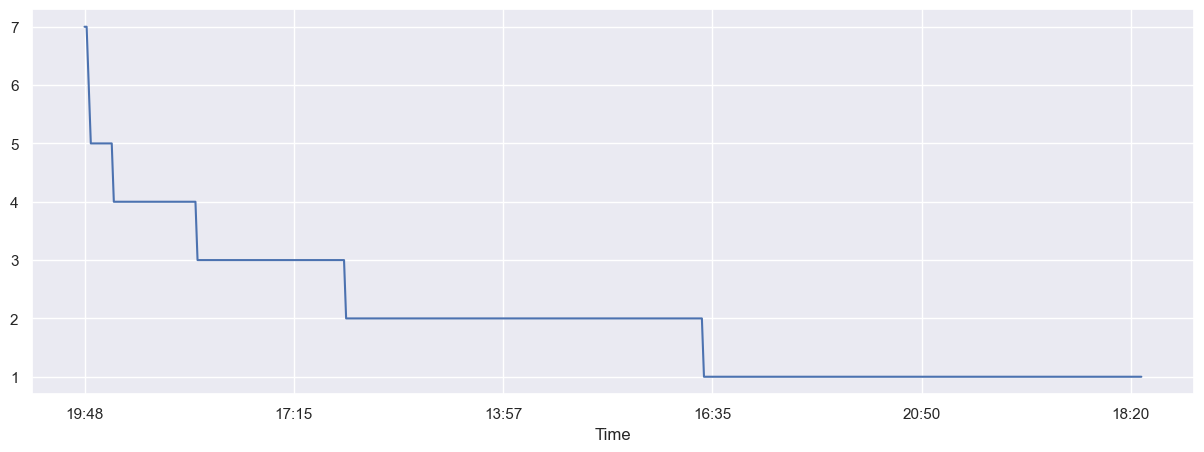

In [202]:
d=df.Time.value_counts().plot(kind='line')
d

from above we anaylsis that from 5pm -8pm will have more customer between this time

Text(0, 0.5, 'no. of cusotmer')

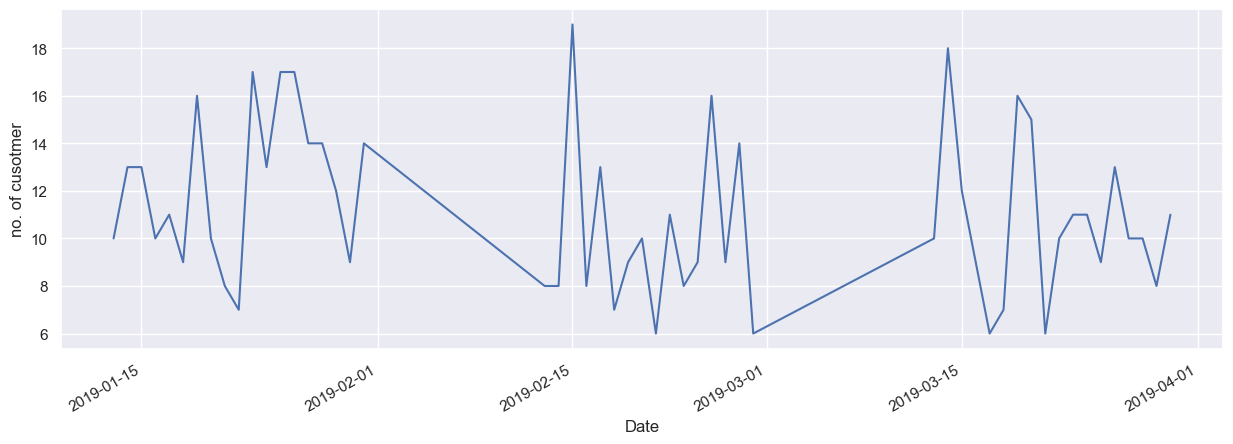

In [256]:
df.Date.value_counts().plot(kind='line')
plt.ylabel('no. of cusotmer')

from jan - mar list of this data include the each day how many customer did shopping 


# conclusion

business is down due to less numbers of customer .there are many reasons for that  

# some reason which you have to correct in future 

*number of female are more compared to male
*female customer are not intersed in your customics items
*male are also very low buying sports items
*profit margin percent is very low
*branch A and B business less compared to C


# some suggestion might help you in future

keep the elements which are more attracted to both men and women.
keep some discount when the business is low and hike price slowly when u get some good results and
always have numerous type of payment method specially EMI or some credit card offers.
Give some discount on weekdays and increase the price in the weekends and also
provide some coupoun for daily customers and also have discount on memberships customer.
Enagage your customer by provide all the items they required
